In [1]:
pip install scikit-plot


Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import scikitplot as skplt
# Load the dataset
dataset = pd.read_csv("destree.csv")


In [27]:
dataset.head(20)

,bedrooms,bathrooms,floors,price
0,5,3,1,Low
1,4,3,2,Average
2,4,3,3,High
3,4,3,1,High
4,5,3,1,Low
5,5,3,1,Average
6,4,3,1,High
7,5,3,1,Low
8,4,2,2,High
9,4,3,1,Low


In [4]:

# Split the dataset into features and label
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


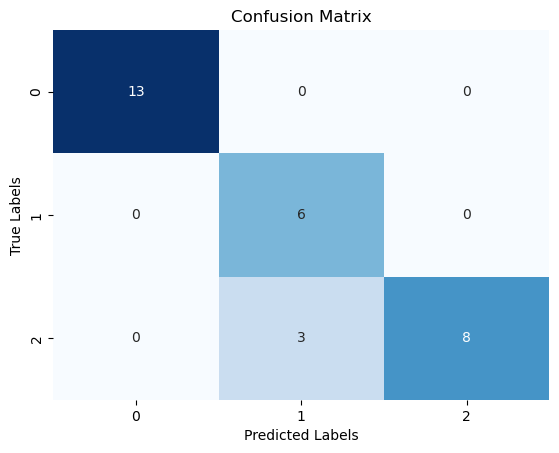

Classification Report:
              precision    recall  f1-score   support

     Average       1.00      1.00      1.00        13
        High       0.67      1.00      0.80         6
         Low       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.89      0.91      0.88        30
weighted avg       0.93      0.90      0.90        30



In [5]:

# Train the Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing set
# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions and y_test DataFrames to NumPy arrays
predictions = predictions.ravel()
y_test = y_test.ravel()

# Plot the confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictions), cmap='Blues', annot=True, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


print("Classification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[13  0  0]
 [ 0  6  0]
 [ 0  3  8]]
Accuracy: 0.9


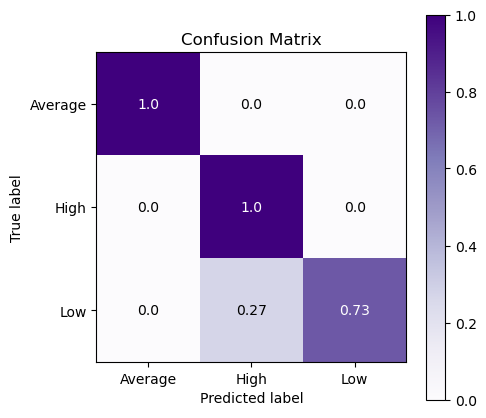

In [6]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", round(accuracy, 4))

import scikitplot as skplt

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, predictions,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax
                                    );
